Data pre processing (train data jpg to png)

In [1]:
import tensorflow as tf

In [2]:
pip install pillow

In [3]:
from PIL import Image

In [4]:
from matplotlib import image
import matplotlib.pyplot as plt
import os
import numpy as np

In [54]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, Flatten, Dense,Dropout,UpSampling2D,concatenate, Add
from tensorflow.keras.models import Model

In [6]:
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import concatenate

In [8]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import glob

In [9]:
#ls "ISIC2018_Task1-2_Training_Data/ISIC2018_Task1_Training_GroundTruth_x2"

In [10]:
data_folder = "C:/Users/s4560340/Downloads/ISIC2018_Task1-2_Training_Data/"

inputs = glob.glob(data_folder + "ISIC2018_Task1-2_Training_Input_x2/*.jpg")
inputs.sort()
labels = glob.glob(data_folder + "ISIC2018_Task1_Training_GroundTruth_x2/*.png")
labels.sort()

assert(len(inputs) == len(labels))
for i in range(len(inputs)):
    x = np.asarray(Image.open(inputs[i]))
    y = np.asarray(Image.open(labels[i]))

In [11]:
length = len(x)

In [12]:
print(len(labels))
print(x)
print(i)

2594
[[[ 61  57  56]
  [ 65  56  59]
  [ 67  56  60]
  ...
  [ 85  85  85]
  [ 84  84  84]
  [ 84  82  83]]

 [[ 68  63  60]
  [ 65  56  57]
  [ 63  52  56]
  ...
  [ 83  83  83]
  [ 84  82  83]
  [ 86  82  83]]

 [[ 65  60  57]
  [ 64  55  56]
  [ 64  54  55]
  ...
  [ 82  81  79]
  [ 87  86  84]
  [ 90  84  84]]

 ...

 [[102 101  97]
  [107 103 102]
  [113 109 110]
  ...
  [136 105  87]
  [141 109  94]
  [140 108  95]]

 [[110 105 101]
  [110 104 104]
  [112 106 106]
  ...
  [137 108  92]
  [139 110  96]
  [136 107  93]]

 [[105 100  94]
  [112 104 101]
  [113 103 104]
  ...
  [138 109  95]
  [141 114  97]
  [136 109  92]]]
2593


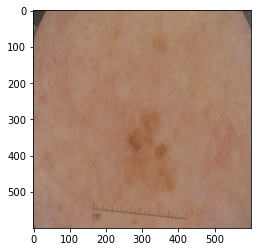

In [25]:
plt.imshow(x_)

In [89]:
a = []
b = []
for i in range(len(inputs)):
    a_ = np.asarray(Image.open(inputs[i]).resize((512,512)))
    a.append(a_)
    b_ = np.asarray(Image.open(labels[i]).resize((512,512)))
    b.append(b_)

In [90]:
print(len(a))
print(len(b))

2594
2594


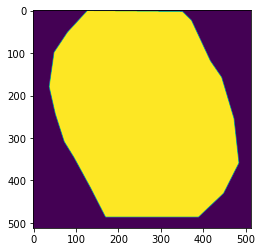

In [91]:
plt.imshow(b[45])

In [92]:
length = len(a)
train_length = np.round(0.6*length)
validation_length = np.round(0.15*length)
test_length = np.round(0.25*length)

In [93]:
print(length)
print(train_length)
print(validation_length)
print(test_length)

2594
1556.0
389.0
648.0


In [94]:
train = a[0:int(train_length)]
train = np.asarray(train)
validation = a[int(train_length+1):int(train_length+validation_length+1)]
validation = np.asarray(validation)
test = a[int(train_length+validation_length):2593]
test = np.asarray(test)

In [95]:
print(length)
print(len(train))
print(len(validation))
print(len(test))

2594
1556
389
648


In [96]:
train_data = train [:, :, :, np.newaxis]
validation_data = validation[:, :, :, np.newaxis]
test_data = test[:, :, :, np.newaxis]

In [97]:
print(train.shape)
print(validation.shape)
print(test.shape)

(1556, 512, 512, 3)
(389, 512, 512, 3)
(648, 512, 512, 3)


In [98]:
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)

(1556, 512, 512, 1, 3)
(389, 512, 512, 1, 3)
(648, 512, 512, 1, 3)


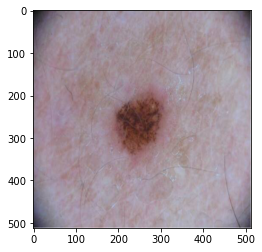

In [99]:
plt.imshow(train[9])

In [75]:
label_=[]
for file in os.listdir("C:/Users/s4560340/Downloads/ISIC2018_Task1-2_Training_Data/ISIC2018_Task1_Training_GroundTruth_x2"):
    #print(file)
    if ".png" in file:
        label_.append((image.imread("C:/Users/s4560340/Downloads/ISIC2018_Task1-2_Training_Data/ISIC2018_Task1_Training_GroundTruth_x2/"+file)).resize((600,600)))
labels_=np.asarray(label_)

In [76]:
labels_

array([None, None, None, ..., None, None, None], dtype=object)

In [68]:
length_lbl = len(labels_)
train_length = np.round(0.6*length_lbl)
validation_length = np.round(0.15*length_lbl)
test_length = np.round(0.25*length_lbl)

In [69]:
print(length)
print(train_length)
print(validation_length)
print(test_length)

2594
1556.0
389.0
648.0


In [100]:
train_label = b[0:int(train_length)]
train_label = np.asarray(train_label)
validation_label = b[int(train_length+1):int(train_length+validation_length+1)]
validation_label = np.asarray(validation_label)
test_label = b[int(train_length+validation_length):2593]
test_label = np.asarray(test_label)

In [101]:
print(train_label.shape)
print(validation_label.shape)
print(test_label.shape)

(1556, 512, 512)
(389, 512, 512)
(648, 512, 512)


In [102]:
train_labels = train_label[:, :, :, np.newaxis]
validation_labels = validation_label[:, :, :, np.newaxis]
test_labels = test_label[:, :, :, np.newaxis]

In [103]:
print(train_labels.shape)
print(validation_labels.shape)
print(test_labels.shape)

(1556, 512, 512, 1)
(389, 512, 512, 1)
(648, 512, 512, 1)


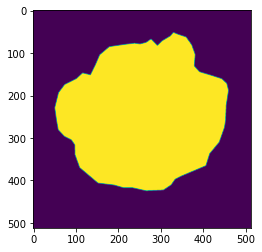

In [104]:
plt.imshow(train_labels[19])

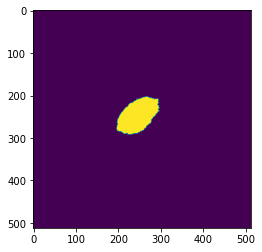

In [105]:
plt.imshow(train_labels[89])

In [106]:
train[89].shape

(512, 512, 3)

In [107]:
input__ = Input((512,512,3))

In [160]:
c1 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(input__)

##first context module
context_mod1_layer1 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(c1)
cont_dropoutlayer1 = Dropout(.3, input_shape=(2,))(context_mod1_layer1)
context_mod1_layer2 =  Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(cont_dropoutlayer1)

##element wise add
elem_add_1 = Add()([c1, context_mod1_layer2])

c2 = Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='same')(elem_add_1)

##second context module
context_mod2_layer1 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(c2)
cont_dropoutlayer2 = Dropout(.3, input_shape=(2,))(context_mod2_layer1)
context_mod2_layer2 =  Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(cont_dropoutlayer2)

##element wise add2
elem_add_2 = Add()([c2, context_mod2_layer2])

c3 = Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same')(elem_add_2)

##third context module
context_mod3_layer1 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(c3)
cont_dropoutlayer3 = Dropout(.3, input_shape=(2,))(context_mod3_layer1)
context_mod3_layer2 =  Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(cont_dropoutlayer3)

##element wise add3
elem_add_3 = Add()([c3, context_mod3_layer2])

c4 = Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same')(elem_add_3)

##fourth context module
context_mod4_layer1 = Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(c4)
cont_dropoutlayer4 = Dropout(.3, input_shape=(2,))(context_mod4_layer1)
context_mod4_layer2 =  Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(cont_dropoutlayer4)

##element wise add4
elem_add_4 = Add()([c4, context_mod4_layer2])


In [161]:
c5 = Conv2D(256, (3, 3), activation='relu', strides=(2, 2), padding='same')(elem_add_4)

##fifth context module
context_mod5_layer1 = Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same')(c5)
cont_dropoutlayer5 = Dropout(.3, input_shape=(2,))(context_mod5_layer1)
context_mod5_layer2 =  Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same')(cont_dropoutlayer5)

##element wise add5
elem_add_5 = Add()([c5, context_mod5_layer2])

##upsampling 1
up_1 = UpSampling2D(size=(2, 2))(elem_add_5)
upconv_1 = Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(up_1)

In [162]:
#concat 1 
con1 = concatenate([elem_add_4,upconv_1], axis = 3)

##localization module 1
loc3x3_1 = Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(con1)
loc1x1_1 = Conv2D(128, (1 ,1), activation='relu', strides=(1, 1), padding='same')(loc3x3_1)

##upsampling 2
up_2 = UpSampling2D(size=(2, 2))(loc1x1_1)
upconv_2 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(up_2)

#concat 2
con2 = concatenate([elem_add_3,upconv_2], axis = 3)

##localization module 2
loc3x3_2 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(con2)
loc1x1_2 = Conv2D(64, (1 ,1), activation='relu', strides=(1, 1), padding='same')(loc3x3_2)

##upsampling 3
up_3 = UpSampling2D(size=(2, 2))(loc1x1_2)
upconv_3 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(up_3)

#concat 3 
con3 = concatenate([elem_add_2,upconv_3], axis = 3)

##localization module 3
loc3x3_3 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(con3)
loc1x1_3 = Conv2D(32, (1 ,1), activation='relu', strides=(1, 1), padding='same')(loc3x3_3)

##upsampling 4
up_4 = UpSampling2D(size=(2, 2))(loc1x1_3)
upconv_4 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(up_4)

#concat 4
con4 = concatenate([elem_add_1,upconv_4], axis = 3)

c6 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(con4)

In [167]:
##segmentation layers
seg_1 = Conv2D(1, (3, 3), activation='relu', strides=(1, 1), padding='same')(c6)

seg_2 = Conv2D(1, (3, 3), activation='relu', strides=(1, 1), padding='same')(loc1x1_3)

seg_3 = Conv2D(1, (3, 3), activation='relu', strides=(1, 1), padding='same')(loc1x1_2)

##element wise add6
elem_add_5 = Add()([seg_2, seg_3])

##element wise add7
elem_add_5 = Add()([elem_add_5, seg_1])

ValueError: Operands could not be broadcast together with shapes (256, 256, 1) (128, 128, 1)

In [168]:
model = Model(input__, seg_1)

In [169]:
model.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_215 (Conv2D)             (None, 512, 512, 16) 448         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_216 (Conv2D)             (None, 512, 512, 16) 2320        conv2d_215[0][0]                 
__________________________________________________________________________________________________
dropout_51 (Dropout)            (None, 512, 512, 16) 0           conv2d_216[0][0]                 
___________________________________________________________________________________________

In [22]:
input__ = Input((256,256,1))
c1 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(input__)
c2 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(c1)
maxpool1 = MaxPooling2D((2, 2))(c2)

c3 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(maxpool1)
c4 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(c3)
maxpool2 = MaxPooling2D((2, 2))(c4)

c5 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(maxpool2)
c6 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(c5)
maxpool3 = MaxPooling2D((2, 2))(c6)

c7 = Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(maxpool3)
c8 = Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(c7)
maxpool4 = MaxPooling2D((2, 2))(c8)

In [23]:
c9 = Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same')(maxpool4)

up1 = Conv2DTranspose(128, (2,2), strides=(2,2), activation='relu')(c9)
con1 = concatenate([c8,up1], axis = 3)
c10 = Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(con1)
c11 = Conv2D(128, (3, 3), activation='relu', strides=(1, 1), padding='same')(c10)

up2 = Conv2DTranspose(64,(2,2), activation='relu', strides=(2,2), padding='same')(c11)
con2 = concatenate([c6,up2], axis = 3)
c12 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(con2)
c13 = Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same')(c11)

up3 = Conv2DTranspose(32,(2,2), activation='relu', strides=(4,4), padding='same')(c13)
con3 = concatenate([c4,up3], axis = 3)
c14 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(con3)
c15 = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same')(c14)

up4 = Conv2DTranspose(16,(2,2), activation='relu', strides=(2,2), padding='same')(c15)
con4 = concatenate([c2,up4], axis = 3)
c16 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(con4)
c17 = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same')(c16)

output = Conv2D(4, 1, activation = 'softmax')(c17)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,train_labels,
                epochs=50,
                batch_size=64,
                shuffle=True,
                validation_data=(validation_data, validation_labels))

Train on 9664 samples, validate on 1120 samples
Epoch 1/50
9664/9664 [==============================] - 1365s 141ms/sample - loss: 0.3003 - accuracy: 0.9253 - val_loss: 0.0943 - val_accuracy: 0.9556
Epoch 2/50
9664/9664 [==============================] - 1326s 137ms/sample - loss: 0.0522 - accuracy: 0.9791 - val_loss: 0.0388 - val_accuracy: 0.9837
Epoch 3/50
9664/9664 [==============================] - 1320s 137ms/sample - loss: 0.0336 - accuracy: 0.9865 - val_loss: 0.0353 - val_accuracy: 0.9854
Epoch 4/50
9664/9664 [==============================] - 1330s 138ms/sample - loss: 0.0269 - accuracy: 0.9893 - val_loss: 0.0244 - val_accuracy: 0.9902
Epoch 5/50
9664/9664 [==============================] - 1356s 140ms/sample - loss: 0.0224 - accuracy: 0.9911 - val_loss: 0.0203 - val_accuracy: 0.9918
Epoch 6/50
9664/9664 [==============================] - 1323s 137ms/sample - loss: 0.0207 - accuracy: 0.9917 - val_loss: 0.0188 - val_accuracy: 0.9924
Epoch 7/50
9664/9664 [========================

1120/1120 - 2s - loss: 0.0137 - accuracy: 0.9948


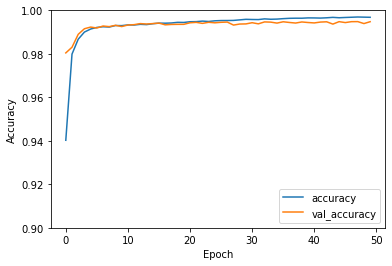

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(validation_data,  validation_labels, verbose=2)

In [30]:
prediction = model.predict(test_data)

In [31]:
prediction

array([[[[9.99749124e-01, 1.67626931e-04, 5.18393463e-05,
          3.13906821e-05],
         [9.99957800e-01, 4.22252997e-05, 3.62911567e-09,
          1.42537904e-09],
         [9.99958873e-01, 4.11550609e-05, 9.34990280e-11,
          3.46028553e-11],
         ...,
         [9.99999166e-01, 8.89849332e-07, 1.62005268e-16,
          6.54967565e-17],
         [9.99961257e-01, 3.87272266e-05, 1.43778506e-14,
          2.67131279e-15],
         [9.99639511e-01, 3.60470236e-04, 3.95116189e-08,
          2.39989060e-08]],

        [[9.99998927e-01, 8.46101841e-07, 6.92415014e-08,
          1.13791565e-07],
         [1.00000000e+00, 2.23375572e-11, 3.87392043e-15,
          5.84716415e-15],
         [1.00000000e+00, 6.07106310e-11, 5.61194996e-17,
          6.72431531e-17],
         ...,
         [1.00000000e+00, 1.35944305e-12, 2.68665638e-28,
          7.08677268e-28],
         [1.00000000e+00, 5.12970178e-12, 1.10579303e-23,
          8.04970392e-24],
         [1.00000000e+00, 1.7860854

In [32]:
prediction_ = []
for i in prediction:
    prediction_.append(np.round(i))

In [40]:
prediction_.shape

AttributeError: 'list' object has no attribute 'shape'

In [41]:
test_labels.shape

(544, 256, 256, 4)

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels,prediction_)

ValueError: Found array with dim 4. Estimator expected <= 2.

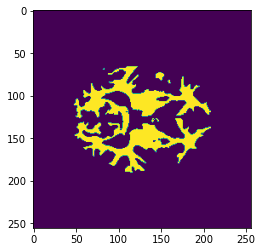

In [36]:
plt.imshow(test_labels[2][:,:,1])

In [4]:
plt.imshow(prediction_[2][:,:,0])

NameError: name 'prediction_' is not defined

In [47]:
from tensorflow.keras import backend as K
def dice_coef(y_true, y_pred, smooth=1):
    
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [49]:
dice_ = dice_coef(test_labels, prediction_, smooth=1)

In [50]:
dice_

<tf.Tensor: shape=(), dtype=float32, numpy=0.9940109>